In [123]:
### import packages

## lets basic import packages
import numpy as np #libraries used for arrays ;,,
import pandas as pd # mostly for data reading from csv files
import matplotlib.pyplot as plt # used for Data visualization like ploting graphs etc
import seaborn as sns #for making statistical graphics and easy to integrate with panda 
from sklearn.model_selection import train_test_split #split data into train and test 
from sklearn.utils import shuffle 
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import pickle


In [124]:
## import data
df = pd.read_csv('dataset.csv')
# df = shuffle(df, random_state = 42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
## remove ('_') underscore in the text
for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')
    
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
## charactieristics of data
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,muscle pain,chest pain,chest pain,blood in sputum,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


<AxesSubplot: >

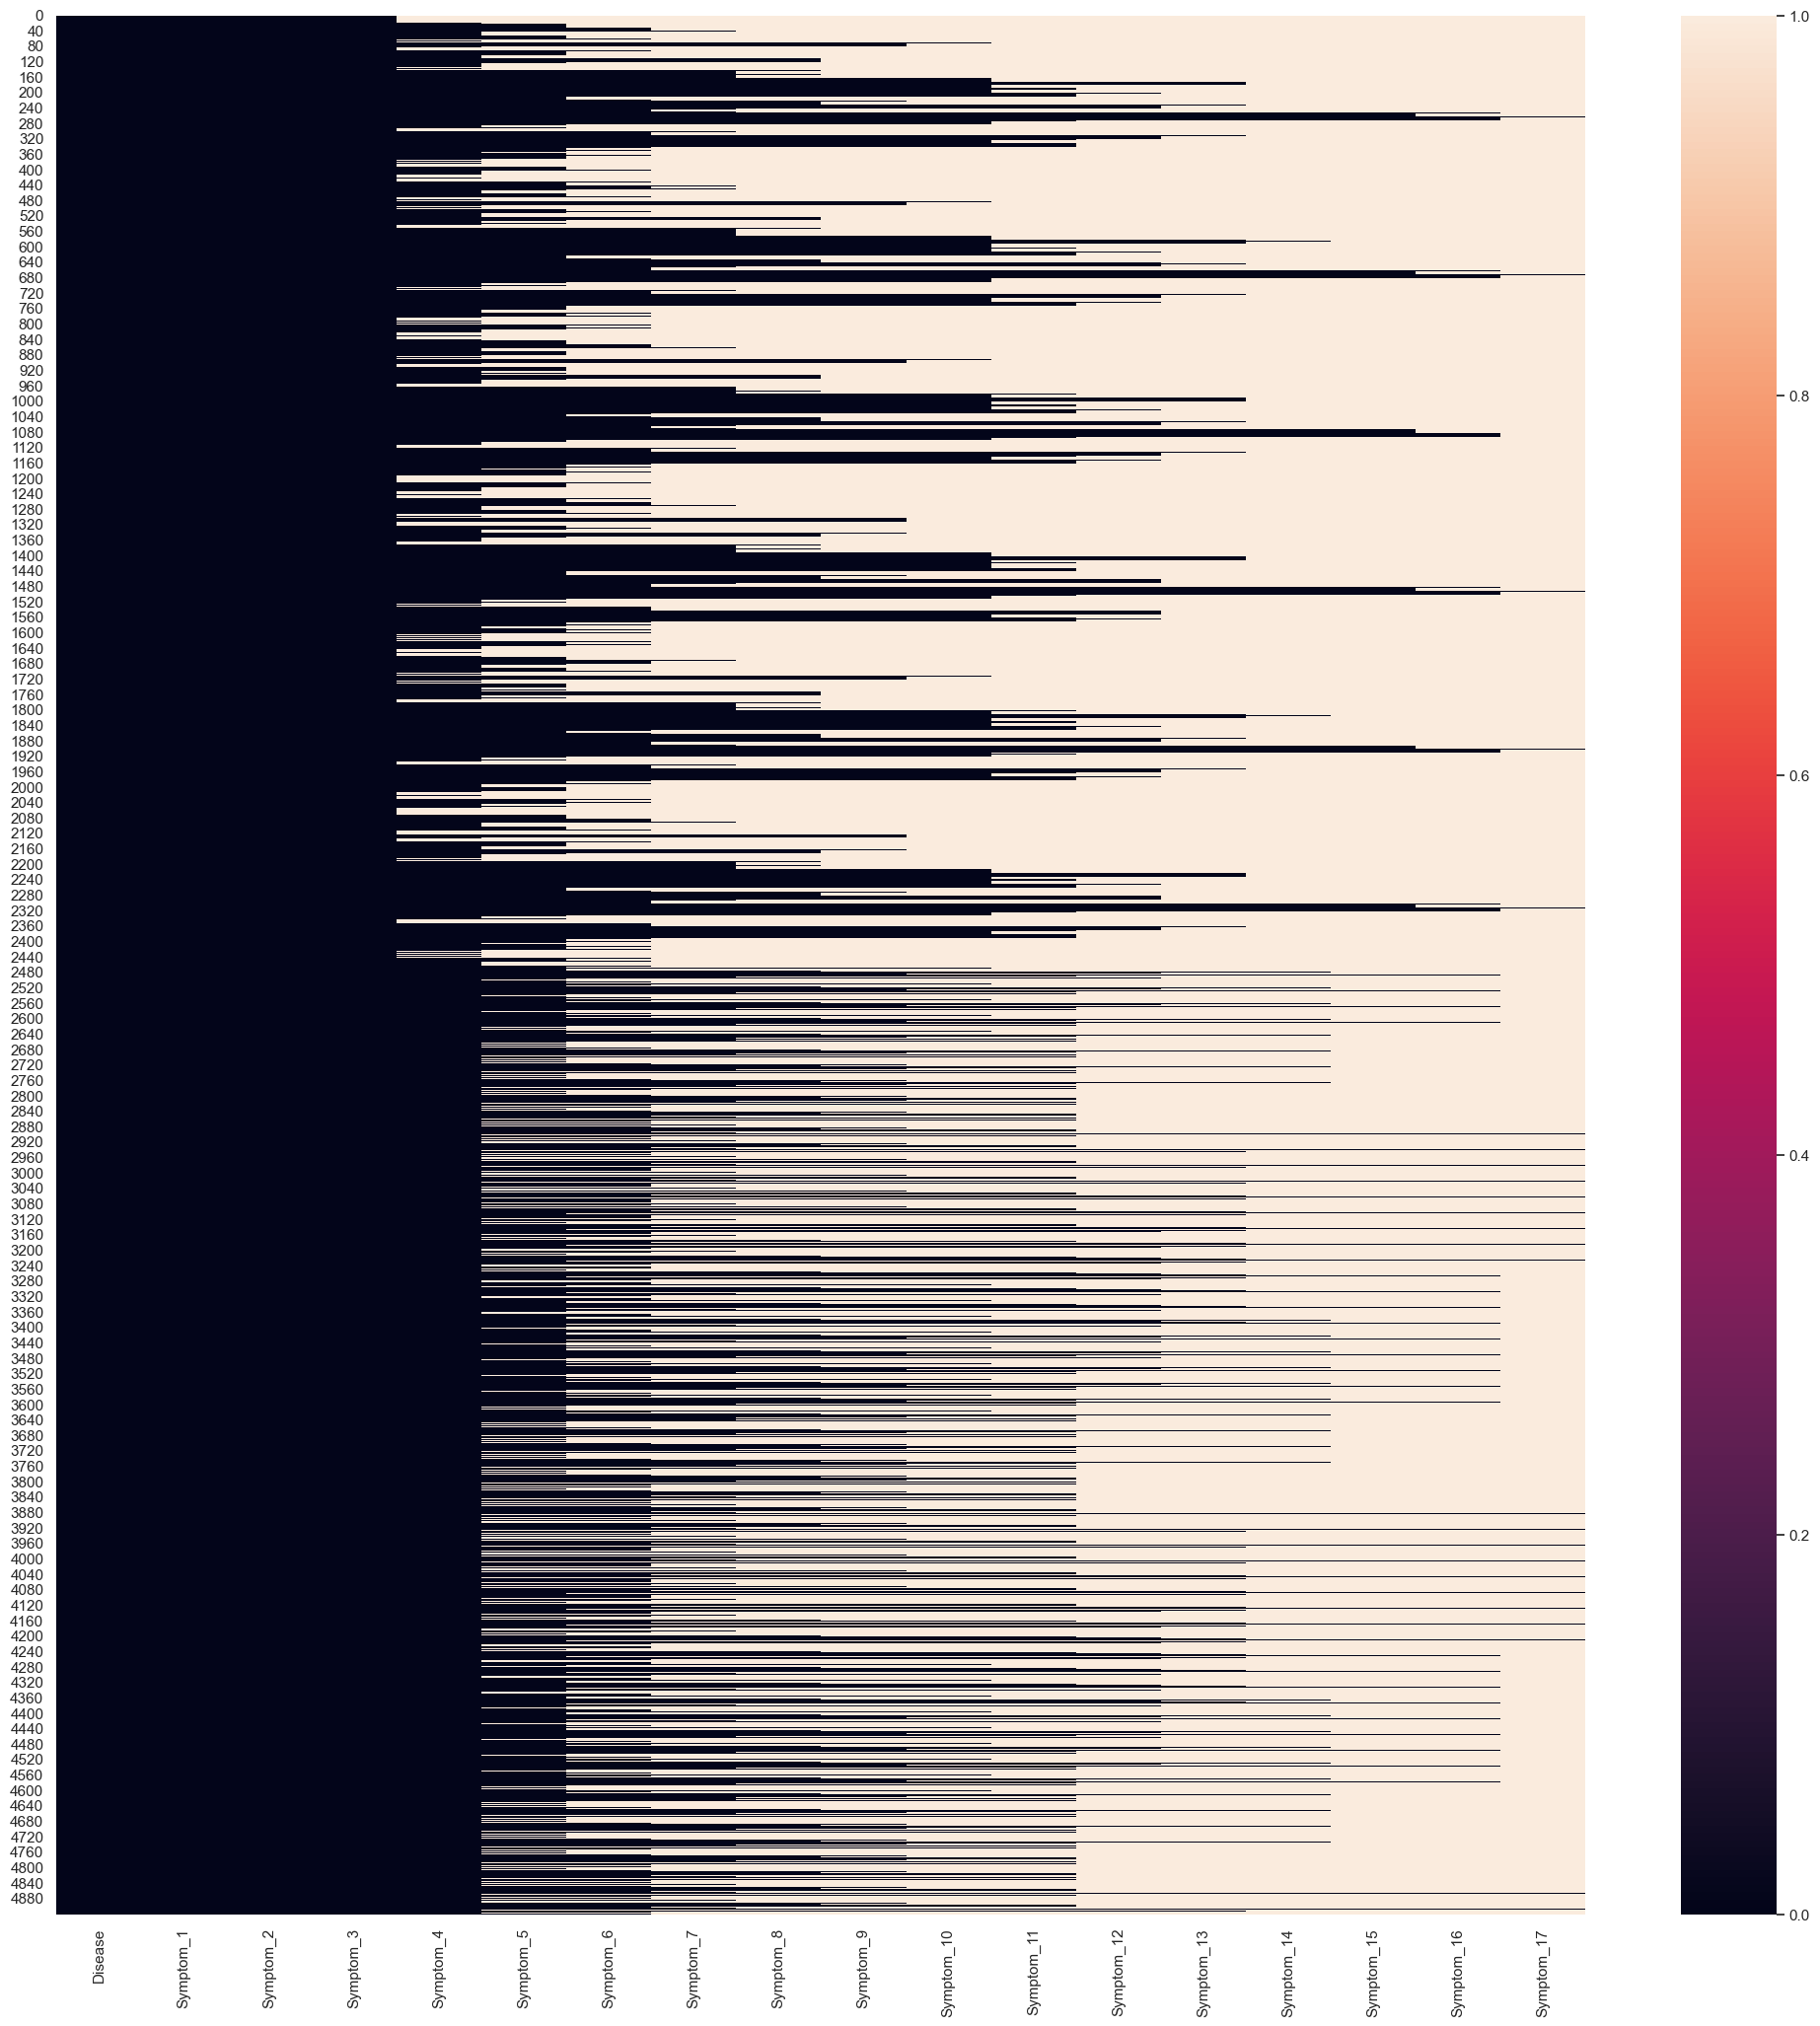

In [127]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [128]:
## check null values
# null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
null_checker=df.isnull().sum()/df.shape[0]*100
print(null_checker)

Disease        0.000000
Symptom_1      0.000000
Symptom_2      0.000000
Symptom_3      0.000000
Symptom_4      7.073171
Symptom_5     24.512195
Symptom_6     40.365854
Symptom_7     53.902439
Symptom_8     60.487805
Symptom_9     65.609756
Symptom_10    69.268293
Symptom_11    75.731707
Symptom_12    84.878049
Symptom_13    89.756098
Symptom_14    93.780488
Symptom_15    95.121951
Symptom_16    96.097561
Symptom_17    98.536585
dtype: float64


In [129]:
drop_cols=null_checker[null_checker>20].keys()
print(drop_cols)

Index(['Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')


In [130]:
df2=df.drop(columns=drop_cols)

In [131]:
df2.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN


<AxesSubplot: >

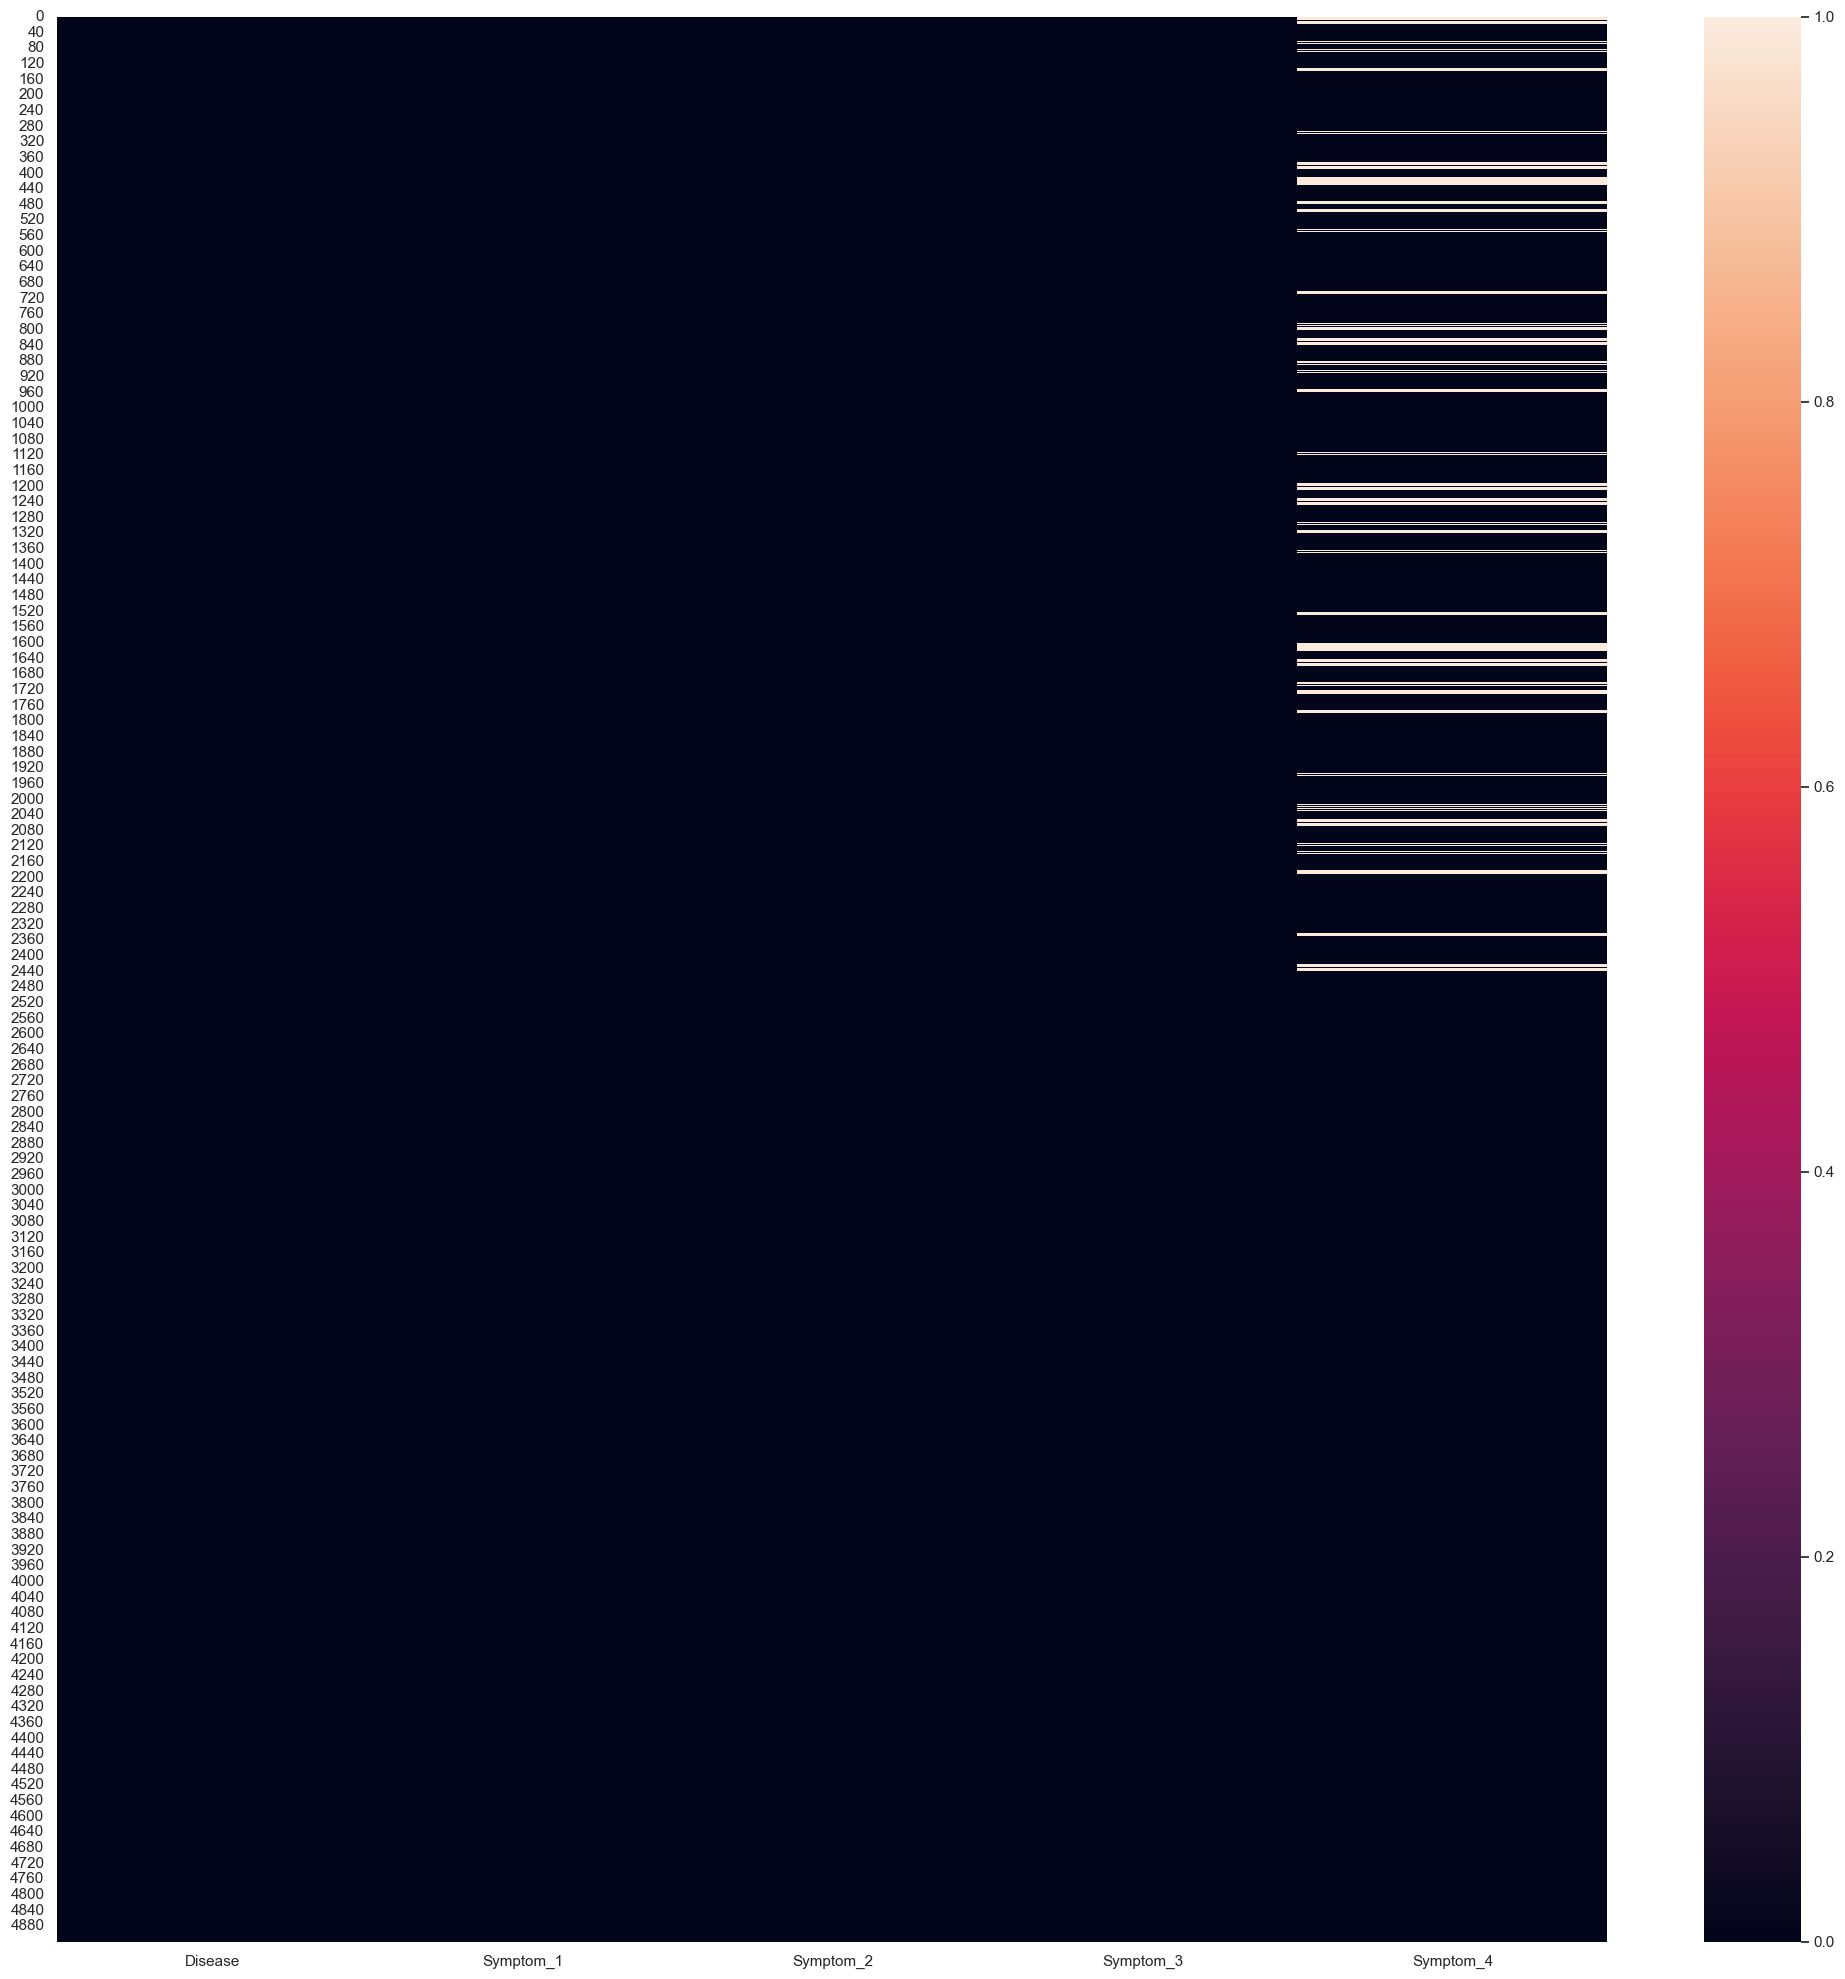

In [132]:
plt.figure(figsize=(25,25))
sns.heatmap(df2.isnull())

In [133]:
df2.to_csv('updateset.csv',index=False)

In [134]:
# ## plot of null value
# plt.figure(figsize=(10, 5), dpi=100)
# plt.plot(null_checker.index, null_checker['count'])
# plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
# plt.title('Ratio of Null values')
# plt.xlabel('column names')
# plt.margins(0.1)
# plt.show()

In [135]:
#  producing a Series with transformed values 
cols = df2.columns

data = df2[cols].values.flatten()
reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df2.shape)

df2 = pd.DataFrame(reshaped, columns = df2.columns)
df2.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN


In [136]:
## lets fill nan values
# df2 = df2.fillna(0)
# df2.head()

In [137]:
## lets explore symptom severity
df_severity = pd.read_csv('Symptom-severity.csv')
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_',' ')
df_severity.head(10)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [138]:
df_severity.to_csv('newseverity.csv',index=False)

In [139]:
## overall list
df_severity['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

This Cell needs to be understood 

In [140]:
symptoms = df_severity['Symptom'].unique()
print(len(symptoms))

132


In [141]:
## lets encode symptoms in the data
vals = df2.values
symptoms = df_severity['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_severity[df_severity['Symptom'] == symptoms[i]]['weight'].values[0]

In [142]:
df_processed = pd.DataFrame(vals, columns=cols)
df_processed.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,Fungal infection,1,3,4,dischromic patches
1,Fungal infection,3,4,dischromic patches,NaN
2,Fungal infection,1,4,dischromic patches,NaN
3,Fungal infection,1,3,dischromic patches,NaN
4,Fungal infection,1,3,4,NaN


In [143]:
# df_processed.to_csv('pre_processed.csv',index=False)
df_processed.to_csv('newprocess.csv',index=False)


In [144]:
## assign symptoms with no rank to zero
df_processed = df_processed.replace('dischromic  patches', 0)
df_processed = df_processed.replace('spotting  urination', 0)
df_processed = df_processed.replace('foul smell of urine', 0)

In [145]:
df_processed.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,Fungal infection,1,3,4,0.0
1,Fungal infection,3,4,0,NaN
2,Fungal infection,1,4,0,NaN
3,Fungal infection,1,3,0,NaN
4,Fungal infection,1,3,4,NaN


In [146]:
missing_num_var = [var for var in df_processed.columns if df_processed[var].isnull().sum()>0]
missing_num_var

['Symptom_4']

C:\Users\hasee\AppData\Local\Temp\ipykernel_13660\242811652.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_processed[var], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})


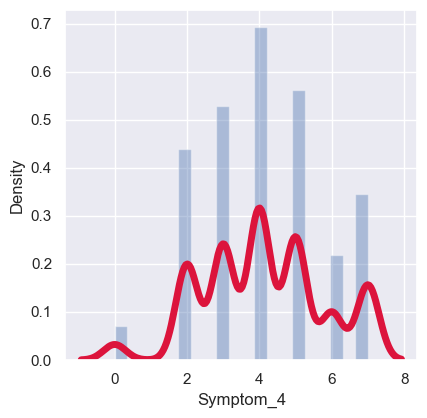

In [147]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df_processed[var], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [148]:
df_processed=df_processed.fillna(df_processed.mean())
df_processed['Symptom_4'] = df_processed['Symptom_4'].astype(int)
df_processed.head(5)


C:\Users\hasee\AppData\Local\Temp\ipykernel_13660\116144208.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_processed=df_processed.fillna(df_processed.mean())


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,Fungal infection,1,3,4,0
1,Fungal infection,3,4,0,4
2,Fungal infection,1,4,0,4
3,Fungal infection,1,3,0,4
4,Fungal infection,1,3,4,4


In [149]:
df_processed.to_csv('newprocess.csv',index=False)

In [150]:
## split data
# iloc[:,1:] will select all rows but your first column will be excluded

data = df_processed.iloc[:,1:].values
labels = df['Disease'].values

In [151]:
## split train and test data

# help(train_test_split)

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [152]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3936, 4) (3936,) (984, 4) (984,)


In [153]:
print(X_train[0])
print(X_test[0])
print(y_train[0])
print (y_test[0])

[1 3 4 2]
[3 2 2 4]
Chicken pox
Acne


In [154]:
#implementation of decision tree 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
print (tree.fit(X_train, y_train))
print (tree.score(X_train, y_train)*100)


DecisionTreeClassifier()
91.10772357723577


In [155]:

tree.predict([[3,5,3,5]])


array(['Migraine'], dtype=object)

In [156]:
tree.predict([[3,2,2,0]])

array(['Acne'], dtype=object)

In [157]:
tree.predict([[3,3,3,2]])

array(['Psoriasis'], dtype=object)

In [158]:
tree.predict([[3,8,3,2]])

array(['Impetigo'], dtype=object)

In [159]:
#finding Accuracy
# The fit() method takes the training data as arguments, which can be one array in the case of unsupervised learning, or two arrays in the case of supervised learning
tree1 = DecisionTreeClassifier(criterion="entropy")
tree1.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, y_train)*100))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, y_test)*100))
tree1.predict([[2,7,12,15]])

Accuracy on training set: 91.108
Accuracy on test set: 87.398


array(['Arthritis'], dtype=object)

In [160]:
pickle.dump(tree1, open('newmodel.pkl','wb'))

[Text(0.47076779801324503, 0.9545454545454546, 'x[0] <= 3.5\nentropy = 5.356\nsamples = 3936\nvalue = [102, 90, 96, 95, 96, 97, 87, 97, 99, 105, 97, 94\n99, 91, 96, 101, 92, 95, 97, 93, 94, 97, 91, 95\n96, 94, 99, 96, 101, 98, 95, 98, 96, 103, 92, 98\n95, 101, 94, 98, 86]'),
 Text(0.19112168874172186, 0.8636363636363636, 'x[0] <= 2.5\nentropy = 4.673\nsamples = 2193\nvalue = [5, 82, 96, 5, 0, 93, 0, 88, 99, 101, 5, 94, 6\n0, 96, 101, 4, 10, 0, 88, 5, 92, 87, 87, 5, 0\n10, 94, 95, 92, 90, 93, 8, 0, 88, 98, 91, 101\n0, 0, 84]'),
 Text(0.09519867549668874, 0.7727272727272727, 'x[2] <= 4.5\nentropy = 2.843\nsamples = 659\nvalue = [0, 0, 4, 0, 0, 93, 0, 0, 95, 101, 0, 0, 0, 0\n91, 92, 0, 0, 0, 88, 0, 0, 0, 0, 0, 0, 0, 0\n95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.06456953642384106, 0.6818181818181818, 'x[1] <= 4.5\nentropy = 2.373\nsamples = 465\nvalue = [0, 0, 4, 0, 0, 0, 0, 0, 95, 91, 0, 0, 0, 0\n0, 92, 0, 0, 0, 88, 0, 0, 0, 0, 0, 0, 0, 0\n95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]')

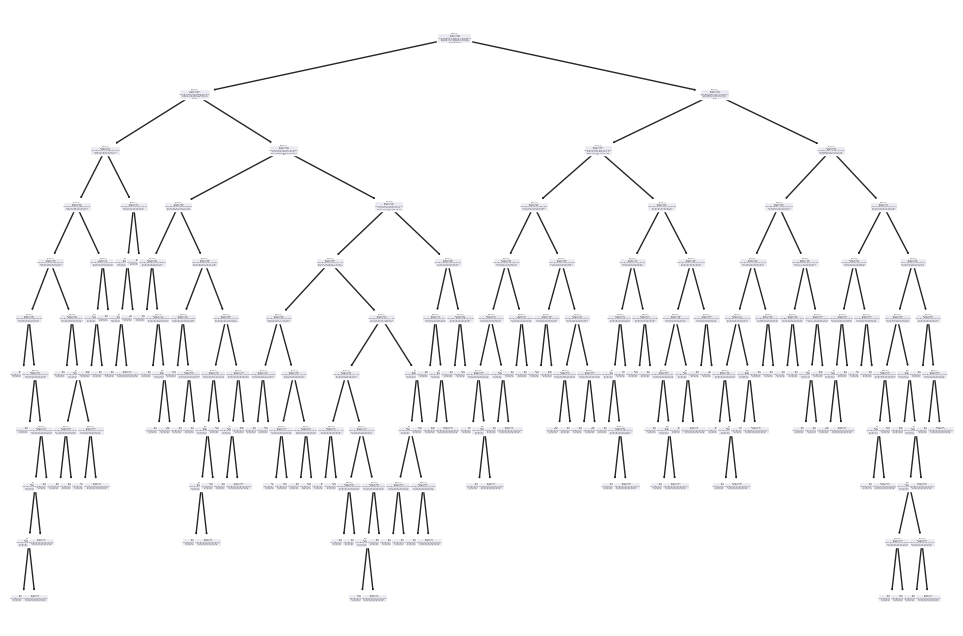

In [120]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(tree1())

In [121]:
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
def confusion_plot(model, X_test, y_test):
    """
    to plot confusion metrix
    """
    plt.figure(figsize=(10, 10), dpi=150)
    
    y_pred = model.predict(X_test)
    con_me = confusion_matrix(y_test, y_pred)
    sns.heatmap(con_me, annot=True)

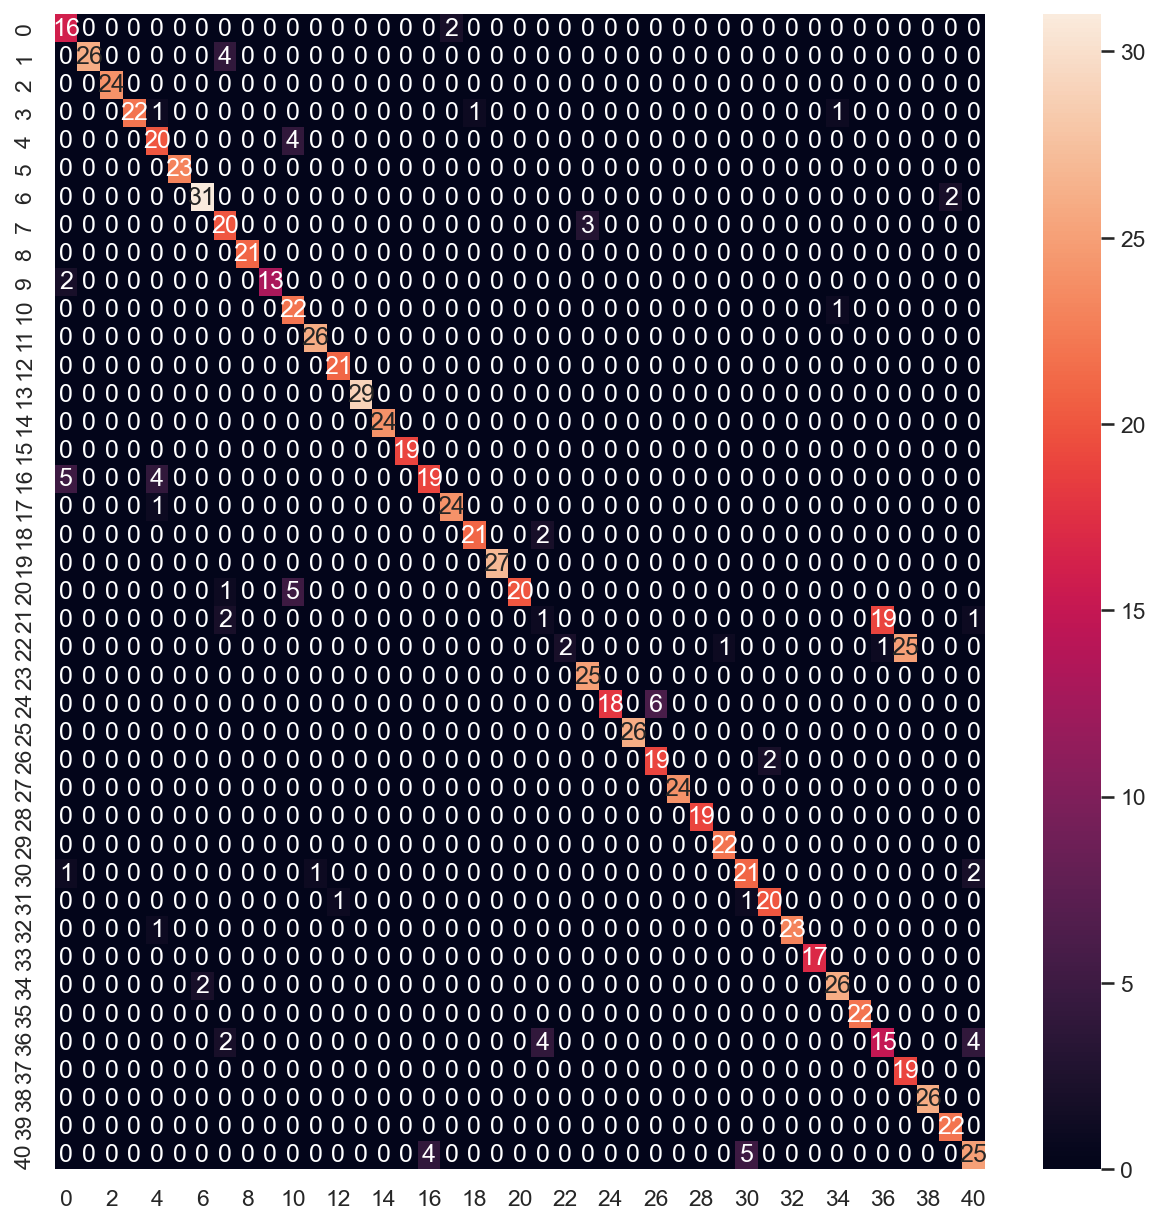

In [122]:
confusion_plot(tree1, X_test, y_test)